# Workshop: Implementação de Circuitos Variacionais Quânticos

Este workshop faz parte do **Simpósio de Computação Quântica da LACIQ**, um evento acadêmico e científico organizado pela **Liga Acadêmica de Computação Quântica da Universidade Federal de Pernambuco (UFPE)**. O simpósio, intitulado **"Salto Quântico: Encontro Acadêmico em Computação Quântica"**, tem como objetivo promover a troca de conhecimentos e inovações na área da computação quântica, reunindo estudantes, pesquisadores e profissionais.

## Objetivo do Workshop

Durante este workshop, exploraremos os **circuitos variacionais quânticos**, uma técnica poderosa para resolver problemas de otimização e machine learning com o uso de computadores quânticos. Os **Quantum Variational Circuits** (QVCs) combinam operações quânticas com parâmetros ajustáveis e técnicas de aprendizado clássico, permitindo que sistemas quânticos sejam treinados para encontrar soluções ótimas.

## O que você irá aprender:

- Introdução aos **circuitos variacionais** e seus principais conceitos.
- A estrutura de um circuito quântico variacional.
- Como implementar e simular um **Quantum Variational Circuit** usando ferramentas de computação quântica.
- Aplicações dos QVCs em problemas de otimização e machine learning.

## Público-alvo

Este workshop é destinado a estudantes e profissionais que possuem um interesse básico ou intermediário em computação quântica e desejam aprender mais sobre a implementação de circuitos quânticos variacionais. Não é necessário ter um conhecimento profundo em computação quântica para acompanhar o conteúdo, embora familiaridade com álgebra linear e conceitos básicos de qubits e portas lógicas seja recomendada.

---

**Organização:** Liga Acadêmica de Computação Quântica (LACIQ)

**Autor:** [Lucas dos Reis Silva](www.linkedin.com/in/lucas-dos-reis-lrs)


# Conjunto de Dados: Banknote Authentication

O conjunto de dados **Banknote Authentication** é amplamente utilizado em problemas de classificação, especialmente em experimentos de aprendizado de máquina. Esse conjunto de dados tem como objetivo determinar se uma cédula de banco é autêntica ou falsa, com base em atributos extraídos de imagens digitalizadas das notas.

## Descrição dos Atributos
O conjunto de dados consiste em cinco colunas, sendo quatro variáveis independentes e uma variável alvo. As imagens das cédulas foram adquiridas por meio de uma varredura com um dispositivo que captura características específicas de cada cédula. A partir dessas imagens, foram extraídas transformadas por uma técnica chamada **Transformada de Wavelet Discreta**, que permitiu a obtenção dos seguintes atributos:

1. **Variance (Variância)**: Refere-se à variância da imagem transformada pelas wavelets. Este atributo mede a dispersão dos dados e é um indicativo de quanto as características da nota variam em relação à sua média.
   
2. **Skewness (Assimetria)**: Representa a assimetria da distribuição dos valores da imagem transformada. Se os dados são inclinados para a esquerda ou direita, isso reflete na assimetria, que pode ser um sinal de distorção ou irregularidade.

3. **Curtosis (Curtose)**: Reflete o "achatamento" ou "agudeza" da distribuição dos dados. Um valor de curtose maior pode indicar picos mais acentuados na distribuição, enquanto valores menores refletem distribuições mais achatadas.

4. **Entropy (Entropia)**: Mede o grau de incerteza ou aleatoriedade presente nos dados. Quanto maior a entropia, maior a desordem, o que pode ser indicativo de maior complexidade na imagem analisada.

5. **Class (Classe)**: A variável alvo que identifica se a cédula é autêntica (valor 1) ou falsa (valor 0).

## Dimensões
O conjunto de dados contém 1.372 amostras, com 762 cédulas autênticas e 610 cédulas falsas. Isso o torna equilibrado o suficiente para treinar modelos de forma eficiente, sem a necessidade de técnicas muito avançadas de balanceamento de dados.

## Fonte
[Banknote Authentication Dataset - UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/267/banknote+authentication)


In [50]:
!pip install pennylane

In [51]:
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import NesterovMomentumOptimizer

import pandas as pd
import itertools

## Tratamento dos Dados

In [52]:
url = "https://tinyurl.com/dataset-qml"
df = pd.read_csv(url)
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [53]:
null_values = df.isnull().sum()
print(null_values)

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64


In [54]:
df = df.dropna()
df.loc[:, "Class"] = df["Class"].map({0:-1,1:1})
df = df.astype(float)
print(df.dtypes)

Variance    float64
Skewness    float64
Curtosis    float64
Entropy     float64
Class       float64
dtype: object


12


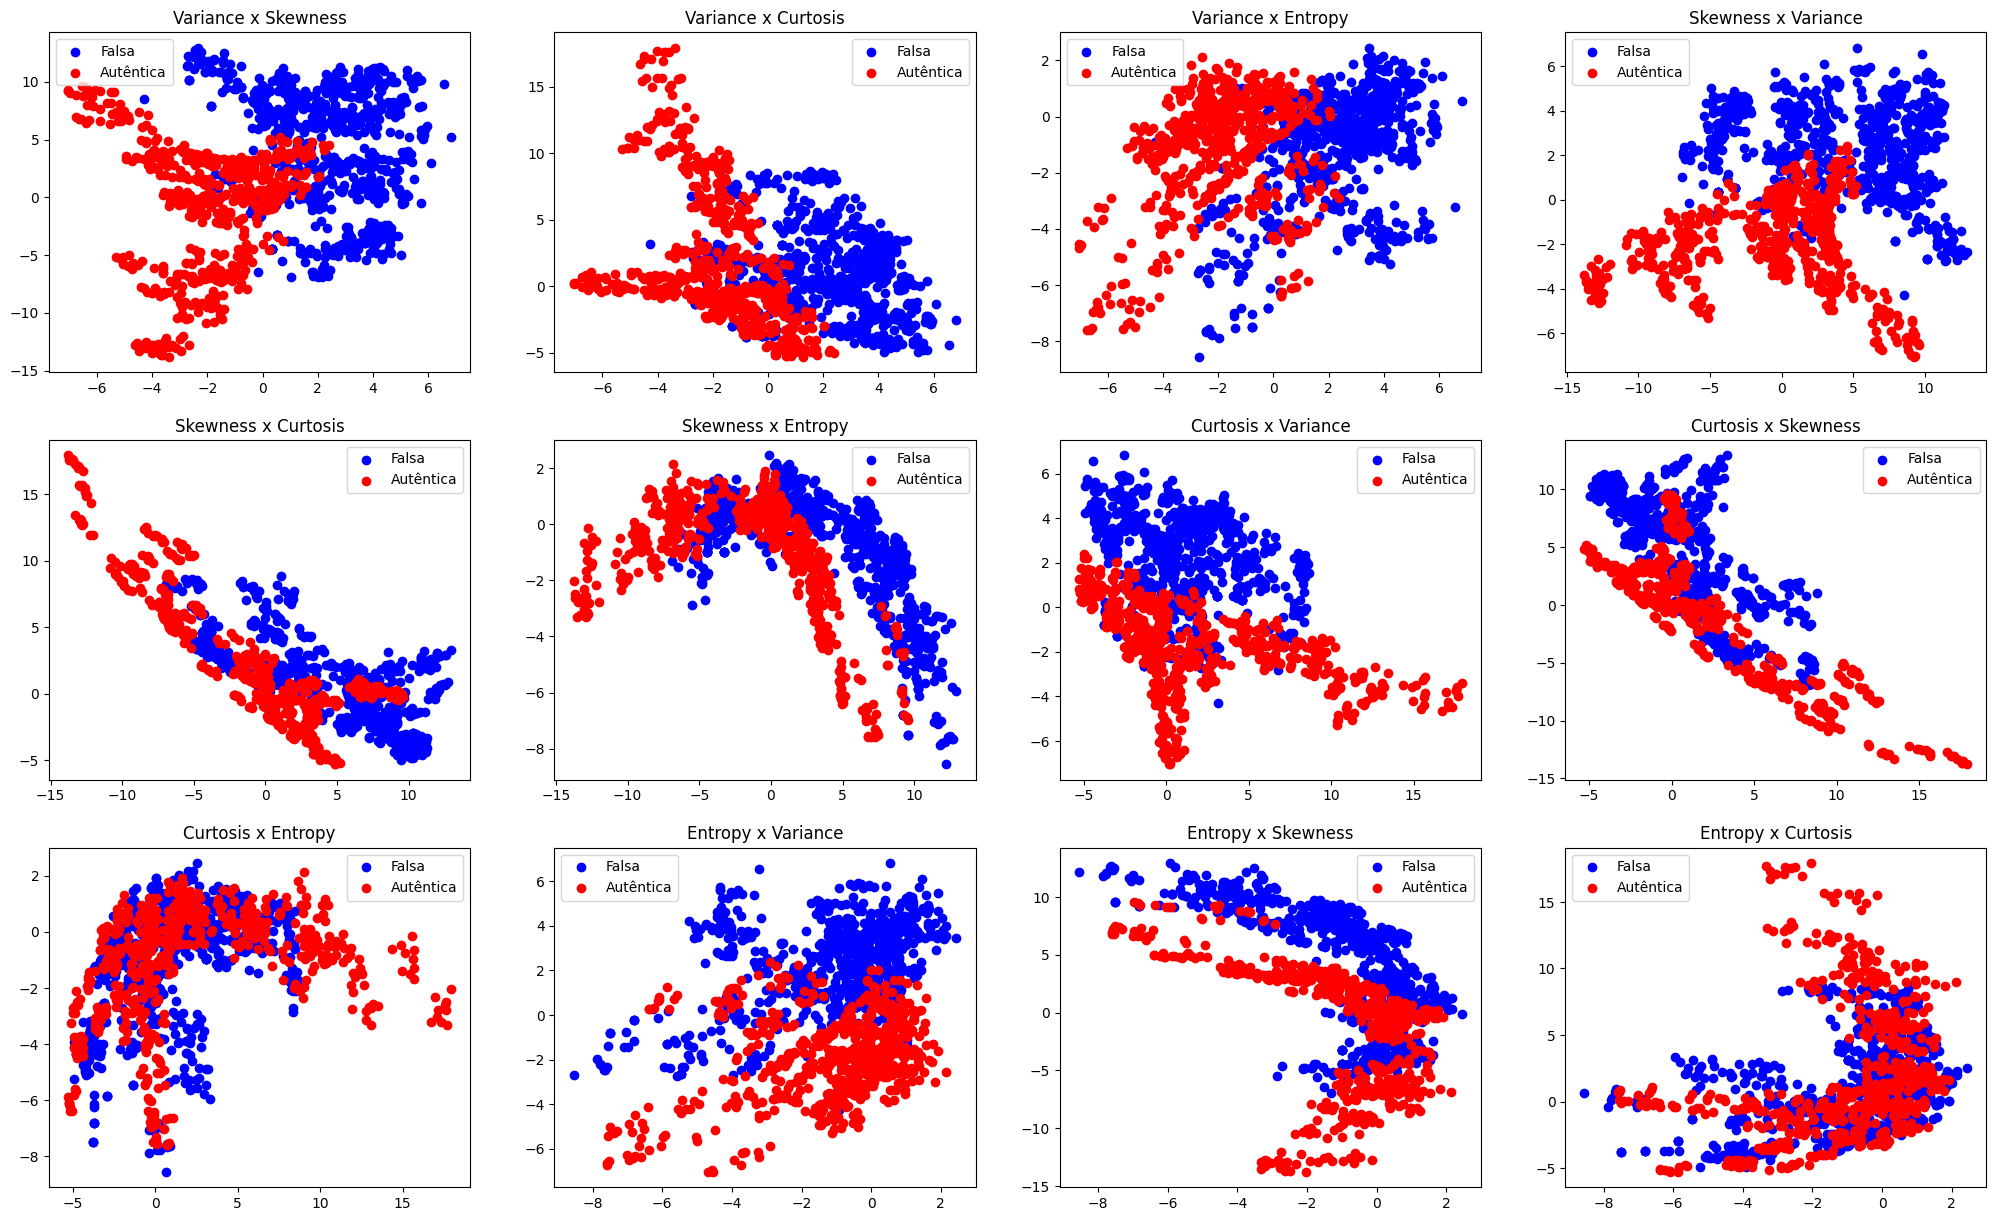

In [55]:
cols = list(df.columns)[:-1]
col_pairs = list(itertools.product(cols,cols))
col_pairs = list(filter(lambda x: (x[0]!=x[1]) ,col_pairs))
print(len(col_pairs))

fig = plt.figure(figsize=(25, 15))

for i,(col1,col2) in enumerate(col_pairs):
    plot = plt.subplot(3, 4, i+1)
    plot.set_title(f"{col1} x {col2}")
    plot.scatter(df[col1][df["Class"]==-1.0],  df[col2][df["Class"]==-1.0], c="b", marker="o",label="Falsa")
    plot.scatter(df[col1][df["Class"]==1.0],  df[col2][df["Class"]==1.0], c="r", marker="o",label="Autêntica")
    plot.legend()

plt.show()

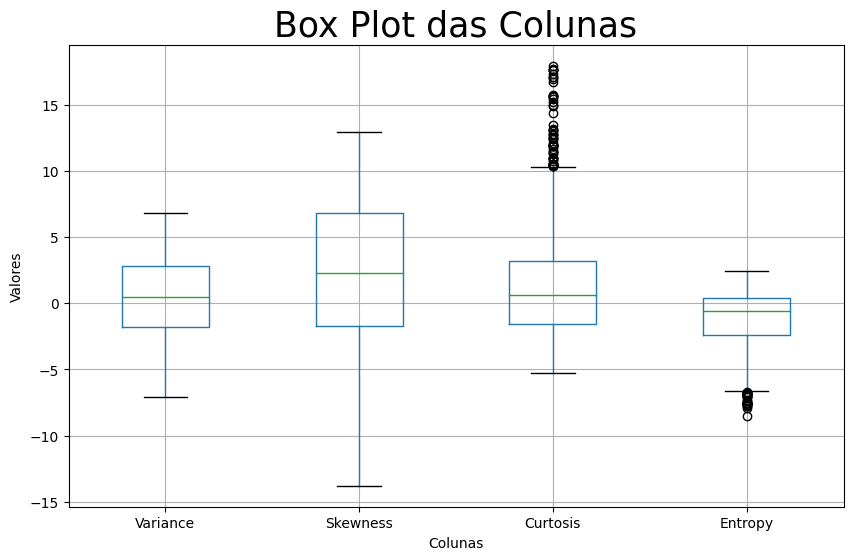

In [56]:
plt.figure(figsize=(10, 6))
df.boxplot(column=['Variance', 'Skewness', 'Curtosis','Entropy'])

plt.title('Box Plot das Colunas',fontsize=25)
plt.xlabel('Colunas')
plt.ylabel('Valores')

plt.show()

In [57]:
X = df.drop(columns=["Class"]).to_numpy()
y = df["Class"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    stratify=y,
                                                    random_state = 27)
X_train, X_val,  y_train,  y_val = train_test_split(X_train,
                                                    y_train,
                                                    test_size = 0.25,
                                                    stratify=y_train,
                                                    random_state = 27)

print(f"Treinamento: {X_train.shape}")
print(f"validação:   {X_val.shape}")
print(f"Teste:       {X_test.shape}")


Treinamento: (771, 4)
validação:   (258, 4)
Teste:       (343, 4)


In [58]:
v_min = np.min(X_train,axis=0)
v_max = np.max(X_train,axis=0)

X_train = 2*np.pi*(X_train-v_min)/(v_max-v_min)
X_val   = 2*np.pi*(X_val  -v_min)/(v_max-v_min)
X_test  = 2*np.pi*(X_test -v_min)/(v_max-v_min)

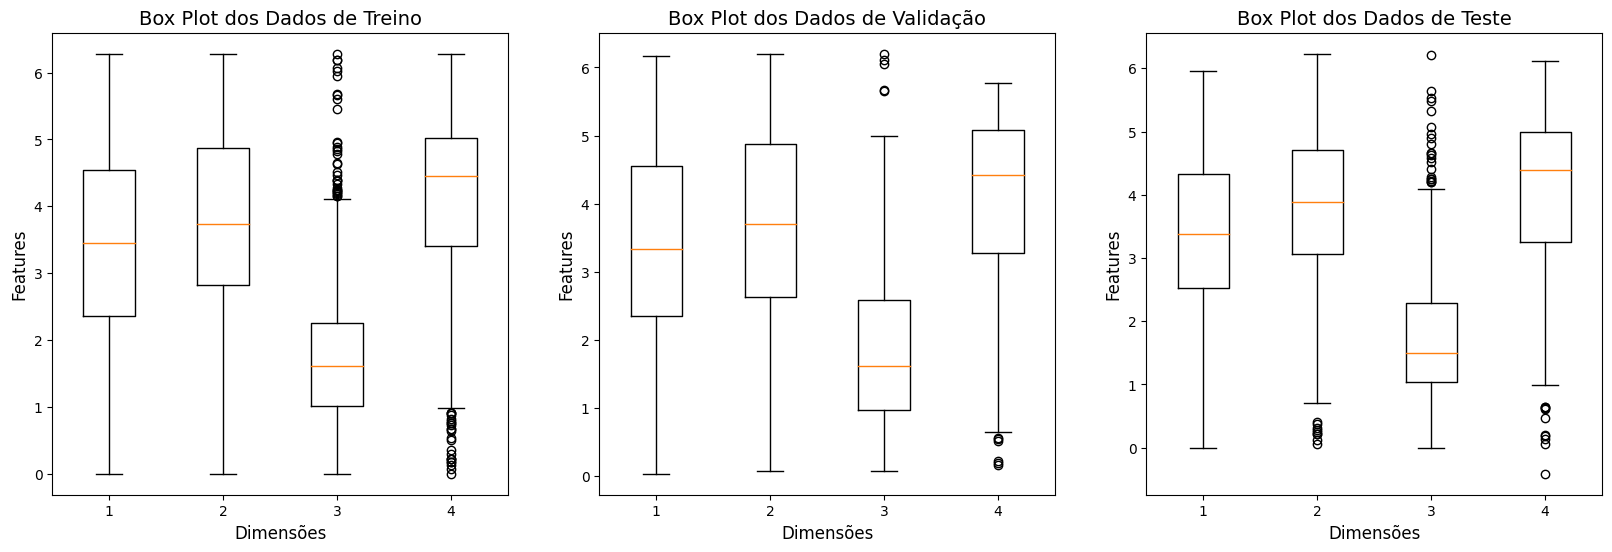

In [59]:
fig = plt.figure(figsize=(20, 6))

for i,(name,data) in enumerate(zip(["Treino","Validação","Teste"],[X_train,X_val,X_test])):
    plot = plt.subplot(1, 3, i+1)
    plot.boxplot(data)

    plot.set_title(f'Box Plot dos Dados de {name}', fontsize=14)
    plot.set_xlabel('Dimensões', fontsize=12)
    plot.set_ylabel('Features', fontsize=12)

plt.show()

# Modelo e Treino

In [80]:
num_qubits = 4
num_layers = 5

dev = qml.device("default.qubit",wires=num_qubits)

In [81]:
@qml.qnode(dev)
def circuit(parameters,x):
    qml.AngleEmbedding(features=x, wires=range(num_qubits), rotation='X')
    qml.StronglyEntanglingLayers(weights=parameters, wires=range(num_qubits))
    return qml.expval(qml.Z(0))

shape = qml.StronglyEntanglingLayers.shape(n_layers=num_layers, n_wires=num_qubits)
weights = 0.01*np.random.random(size=shape,requires_grad=True)
bias = np.array(0.0, requires_grad=True)

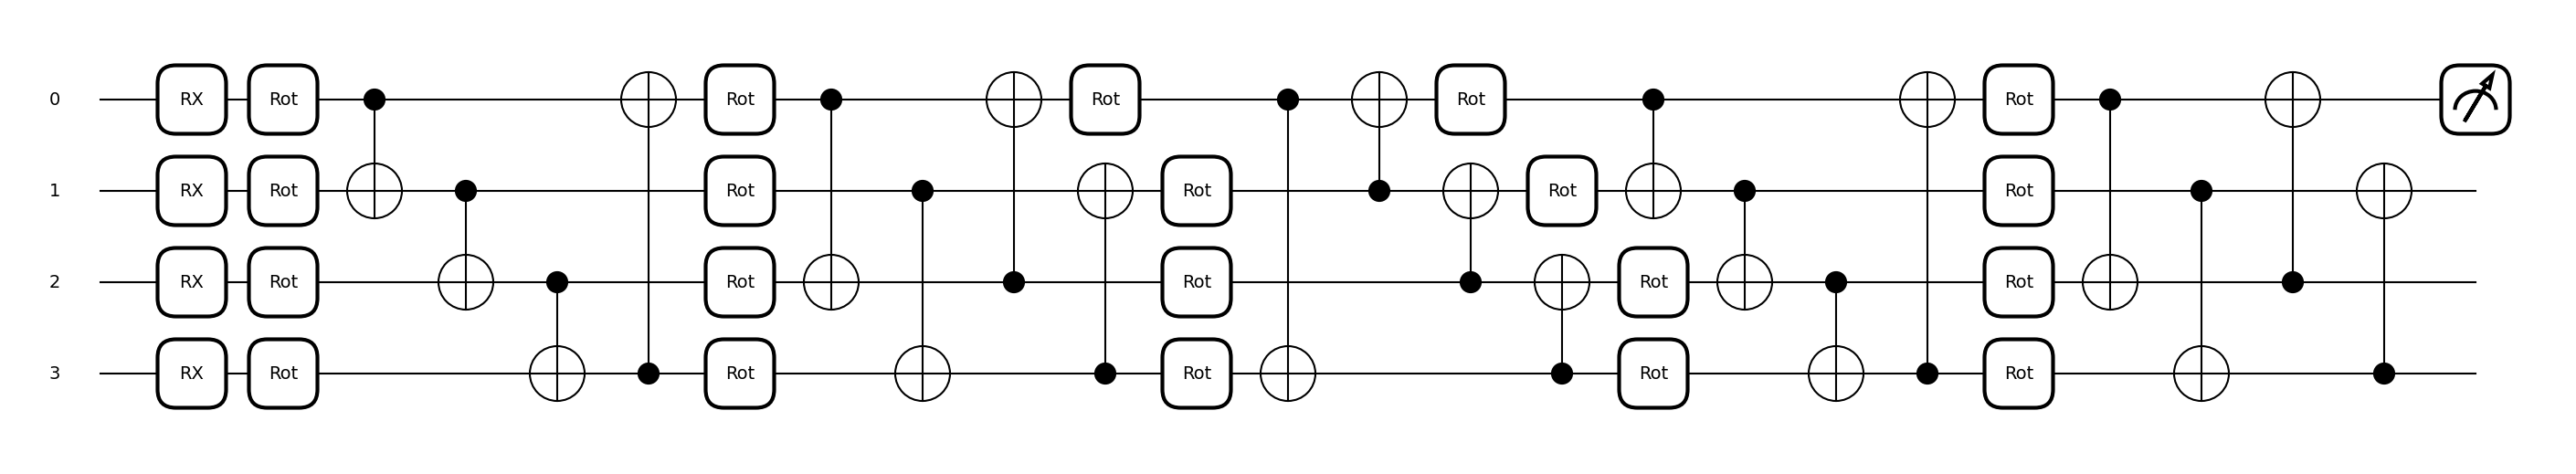

In [82]:
fig, ax = qml.draw_mpl(circuit,level="device")(weights,[1,0,0,0])

In [83]:
def threshold(x):
    if x < 0:
        return -1.0
    else:
        return 1.0

def variational_classifier(weights, bias, x):
    return circuit(weights, x) + bias

def square_loss(labels, predictions):
    return np.mean((labels - qml.math.stack(predictions)) ** 2)

def cost(weights, bias, X, Y):
    predictions = variational_classifier(weights, bias, X)

    return square_loss(Y, predictions)

In [84]:
opt = NesterovMomentumOptimizer(1e-2)

batch_size = 30

states = []

for it in range(500):

    batch_index = np.random.randint(0, len(y_train), (batch_size,))
    X_train_batch = X_train[batch_index]
    y_train_batch = y_train[batch_index]

    weights, bias, _, _ = opt.step(cost, weights, bias, X_train_batch, y_train_batch)

    predictions_train = variational_classifier(weights, bias, X_train)
    predictions_train = np.array(list(map(threshold,predictions_train)))

    predictions_val = variational_classifier(weights, bias, X_val)
    predictions_val = np.array(list(map(threshold,predictions_val)))

    acc_train = accuracy_score(y_train, predictions_train)
    acc_val   = accuracy_score(y_val  , predictions_val)

    states.append([float(acc_val),weights.copy(),bias.copy()])

    if (it + 1) % 10 == 0:
        _cost = cost(weights, bias, X_train, y_train)
        print(
            f"Iter: {it + 1:5d} | "
            f"Cost: {_cost:0.5f} | "
            f"Acc train: {acc_train:.2%} | "
            f"Acc Val: {acc_val  :.2%}"
        )

states.sort(key=lambda x:-x[0])

weights = states[0][1]
bias    = states[0][2]

Iter:    10 | Cost: 1.13367 | Acc train: 50.97% | Acc Val: 53.10%
Iter:    20 | Cost: 1.14545 | Acc train: 48.12% | Acc Val: 50.78%
Iter:    30 | Cost: 1.13636 | Acc train: 49.81% | Acc Val: 50.00%
Iter:    40 | Cost: 1.12483 | Acc train: 49.55% | Acc Val: 52.33%
Iter:    50 | Cost: 1.10967 | Acc train: 52.27% | Acc Val: 49.61%
Iter:    60 | Cost: 1.02484 | Acc train: 55.90% | Acc Val: 53.88%
Iter:    70 | Cost: 0.89052 | Acc train: 66.80% | Acc Val: 65.12%
Iter:    80 | Cost: 0.80598 | Acc train: 71.21% | Acc Val: 65.50%
Iter:    90 | Cost: 0.72284 | Acc train: 73.54% | Acc Val: 68.60%
Iter:   100 | Cost: 0.56471 | Acc train: 83.14% | Acc Val: 78.68%
Iter:   110 | Cost: 0.39984 | Acc train: 91.70% | Acc Val: 90.70%
Iter:   120 | Cost: 0.34699 | Acc train: 90.01% | Acc Val: 88.37%
Iter:   130 | Cost: 0.33890 | Acc train: 90.01% | Acc Val: 88.76%
Iter:   140 | Cost: 0.33110 | Acc train: 90.01% | Acc Val: 88.76%
Iter:   150 | Cost: 0.32052 | Acc train: 89.62% | Acc Val: 88.37%
Iter:   16

In [85]:
pred = variational_classifier(weights, bias, X_train)
pred = np.array(list(map(threshold,pred)))
print(classification_report(y_train,pred))

              precision    recall  f1-score   support

        -1.0       0.97      0.91      0.94       429
         1.0       0.90      0.97      0.93       342

    accuracy                           0.94       771
   macro avg       0.94      0.94      0.94       771
weighted avg       0.94      0.94      0.94       771



In [86]:
pred = variational_classifier(weights, bias, X_val)
pred = np.array(list(map(threshold,pred)))


print(classification_report(y_val,pred))

              precision    recall  f1-score   support

        -1.0       0.98      0.90      0.93       143
         1.0       0.88      0.97      0.93       115

    accuracy                           0.93       258
   macro avg       0.93      0.93      0.93       258
weighted avg       0.93      0.93      0.93       258



In [87]:
pred = variational_classifier(weights, bias, X_test)
pred = np.array(list(map(threshold,pred)))

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        -1.0       0.98      0.89      0.93       190
         1.0       0.88      0.97      0.92       153

    accuracy                           0.93       343
   macro avg       0.93      0.93      0.93       343
weighted avg       0.93      0.93      0.93       343



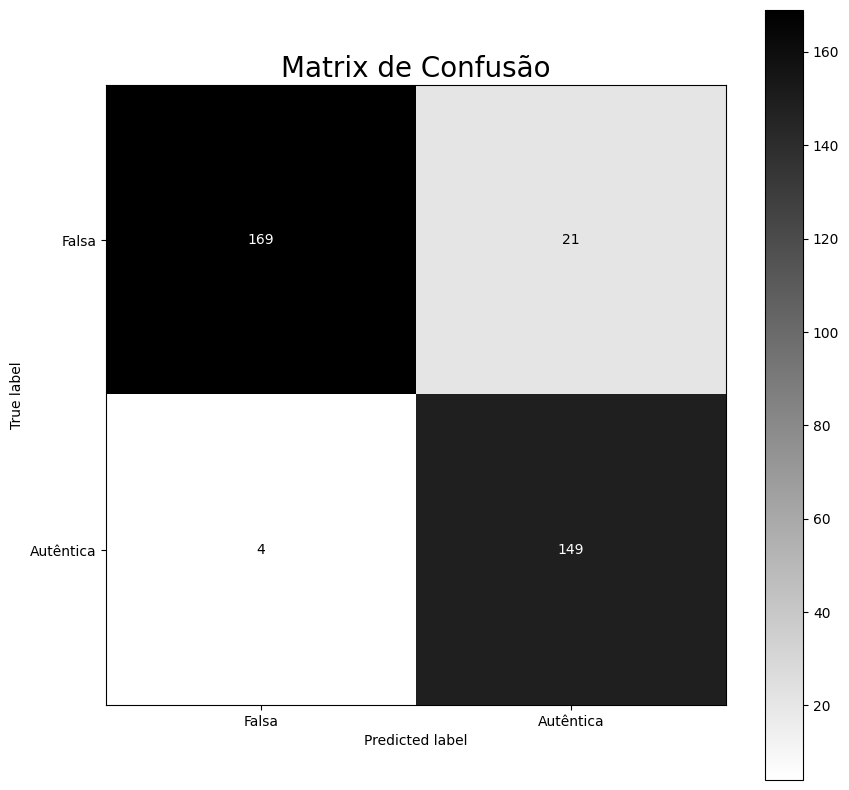

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
labels = ['Falsa','Autêntica']

cm = confusion_matrix(y_test*2, pred*2)
disp  = ConfusionMatrixDisplay(cm)
ax.set_title("Matrix de Confusão",fontsize=20)
disp.plot(ax=ax,cmap="binary")
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.show()

In [70]:
from tqdm.notebook import tqdm

random_states = [390, 318, 243, 571, 740, 390, 443, 554, 475,  66, 304, 266,  14, 442, 949, 415, 793, 740, 28, 294, 595, 647, 262, 136, 795, 773, 748,  63, 802, 297]
results = []
pbar = tqdm(list(enumerate(random_states)))


X = df.drop(columns=["Class"]).to_numpy()
y = df["Class"].to_numpy()

for it,seed in pbar:
    np.random.seed(seed)
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.25, stratify=y, random_state = 27)
    X_train, X_val,  y_train,  y_val = train_test_split( X_train, y_train, test_size = 0.25, stratify=y_train, random_state = 27)

    v_min = np.min(X_train,axis=0)
    v_max = np.max(X_train,axis=0)

    X_train = 2*np.pi*(X_train-v_min)/(v_max-v_min)
    X_val   = 2*np.pi*(X_val  -v_min)/(v_max-v_min)
    X_test  = 2*np.pi*(X_test -v_min)/(v_max-v_min)


    opt = NesterovMomentumOptimizer(1e-2)

    batch_size = 30

    states = []

    for i in range(500):
        pbar.set_description(f"Model {it+1:3} of {len(random_states)} | Training {i:3}:{500}")

        batch_index = np.random.randint(0, len(y_train), (batch_size,))
        X_train_batch = X_train[batch_index]
        y_train_batch = y_train[batch_index]

        weights, bias, _, _ = opt.step(cost, weights, bias, X_train_batch, y_train_batch)

        predictions_val = variational_classifier(weights, bias, X_val)
        predictions_val = np.array(list(map(threshold,predictions_val)))


        acc_val   = accuracy_score(y_val  , predictions_val)

        states.append([float(acc_val),weights.copy(),bias.copy()])


    states.sort(key=lambda x:-x[0])

    weights = states[0][1]
    bias    = states[0][2]

    pred = variational_classifier(weights, bias, X_test)
    pred = np.array(list(map(threshold,pred)))
    results.append(accuracy_score(y_test  , pred))


  0%|          | 0/30 [00:00<?, ?it/s]

      Resultados
Max    :  97.67%
Min    :  96.79%
Média  :  97.53%
Médiana:  97.67%
STD    :  0.21%



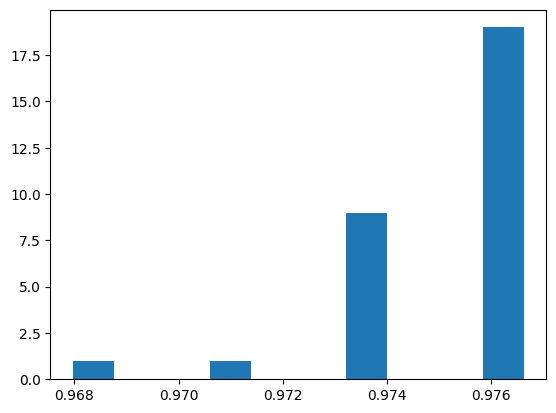

In [71]:
print(f"""      Resultados
Max    :  {np.max(results):.2%}
Min    :  {np.min(results):.2%}
Média  :  {np.mean(results):.2%}
Médiana:  {np.median(results):.2%}
STD    :  {np.std(results):.2%}
""")

plt.hist(results, bins=10,rwidth = 0.9)
plt.show()